# Predicting Online Credit Card Applications (Digital Advertising)
*Final Project #3: Exploratory Data Analysis*
<br>*Jan 28, 2017*

## I. Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/DATA_FOR_MODEL_full.csv', sep=',')
data.head()

,User_ID,Impressions,TimeDiff_Minutes,TimeDiff_Minutes_AVG,Funnel_Upper_Imp,Funnel_Middle_Imp,Funnel_Lower_Imp,Campaign_Message_Travel_Imp,Campaign_Message_Service_Imp,Campaign_Message_Family_Travel_Imp,...,Creative_Size_320x480_Imp,Creative_Size_Uknown_Imp,Device_Desktop_Imp,Device_Other_Imp,Device_Mobile_Imp,Active_View_Eligible_Impressions,Active_View_Measurable_Impressions,Active_View_Viewable_Impressions,Clicks,Conversions
0,AMsySZb5URoHQAqFtc2yx7eWq2AQ,4,9.0,3.000000,0,4,0,0,0,0,...,0,0,4,0,0,4,4,1,NaN,NaN
1,AMsySZZBemBdfIkICNi3QoUi495D,2,39.0,39.000000,0,2,0,0,0,0,...,0,0,2,0,0,2,2,2,NaN,NaN
2,AMsySZYC0gKN-GlCxK2WHC9VbmRV,4,301.0,100.333333,0,4,0,0,0,0,...,0,0,4,0,0,4,4,3,NaN,NaN
3,AMsySZZYuKRxsvW7VFSOGRWlsYZ6,1,NaN,NaN,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,NaN,NaN
4,AMsySZarmBmNJttVh1RdvZNlN7d5,3,103.0,51.500000,0,3,0,0,0,0,...,0,0,3,0,0,3,3,1,NaN,NaN


## II. Dataset Description
*Update from Final Project #2 since the data was manipulated to this format in SQL*
* **Time frame:** Nov 8-Dec 31, 2016
* **Scope:**
    * Canada
    * All of the client's campaigns and strategies 
    * Only ads served via DoubleClick Bid Manager (DBM)
* **Observations at User-level:** The original datasets are at the event-level, e.g. each ad impression.  For this exploratory data analysis, we have already used the **user_id** dimension to collapse the datasets so we have a row for each user.  Therefore, each row of data summarizes the ad exposure for each user during the time period.

Field|Data Type|Type of Variable|Description
---|---|---|---
User_ID|String|N/A|Unique Identifier for each user
Impressions|Integer|Continuous|Total number of ads shown to the user
TimeDiff_Minutes|Float|Continuous|Total time in minutes between first and last impression, Null if only one impression
TimeDiff_Minutes_AVG|Float|Continuous|Average time in minutes between ad impressions, Null if only one impression
Funnel_Upper_Imp|Integer|Continuous|Total impressions from Upper Funnel campaigns
Funnel_Middle_Imp|Integer|Continuous|Total impressions from Middle Funnel campaigns
Funnel_Lower_Imp|Integer|Continuous|Total impressions from Lower Funnel campaigns
Campaign_Message_Travel_Imp|Integer|Continuous|Total impressions from ads with a "Travel" message
Campaign_Message_Service_Imp|Integer|Continuous|Total impressions from ads with a "Service" message
Campaign_Message_Family_Travel_Imp|Integer|Continuous|Total impressions from ads with a "Family Travel" message
Campaign_Card_Cash_Rewards_Imp|Integer|Continuous|Total impressions from ads with a "Cash Rewards" message
Campaign_Card_Premium_Rewards_Imp|Integer|Continuous|Total impressions from ads with a "Premium Rewards" message
Campaign_Card_Other_Imp|Integer|Continuous|Total impressions from ads with a "Other Card" message
Creative_Type_Display_Imp|Integer|Continuous|Total impressions from creative type "Display"
Creative_Type_TrueView_Imp|Integer|Continuous|Total impressions from creative type "TrueView"
Creative_Type_RichMediaExpanding_Imp|Integer|Continuous|Total impressions from creative type "Rich Media Expanding"
Creative_Type_RichMedia_Imp|Integer|Continuous|Total impressions from creative type "Rich Media Display"
Creative_Size_728x90_Imp|Integer|Continuous|Total impressions from creative size 728x90
Creative_Size_300x600_Imp|Integer|Continuous|Total impressions from creative size 300x600
Creative_Size_300x250_Imp|Integer|Continuous|Total impressions from creative size 300x250
Creative_Size_160x600_Imp|Integer|Continuous|Total impressions from creative size 160x600
Creative_Size_468x60_Imp|Integer|Continuous|Total impressions from creative size 468x60
Creative_Size_300x50_Imp|Integer|Continuous|Total impressions from creative size 300x50
Creative_Size_320x50_Imp|Integer|Continuous|Total impressions from creative size 320x50
Creative_Size_320x420_Imp|Integer|Continuous|Total impressions from creative size 320x420
Creative_Size_480x320_Imp|Integer|Continuous|Total impressions from creative size 480x320
Creative_Size_320x480_Imp|Integer|Continuous|Total impressions from creative size 320x480
Creative_Size_Uknown_Imp|Integer|Continuous|Total impressions from unknown creative size
Device_Desktop_Imp|Integer|Continuous|Total impressions from desktops
Device_Other_Imp|Integer|Continuous|Total impressions from mobile devices
Device_Mobile_Imp|Integer|Continuous|Total impressions from other devices (e.g. gaming consoles)
Active_View_Eligible_Impressions|Integer|Continuous|Total impressions that were eligible for viewability measurement
Active_View_Measurable_Impressions|Integer|Continuous|Total impressions that were measureable
Active_View_Viewable_Impressions|Integer|Continuous|Total impressions that were viewable
Clicks|Float|Continuous|Total ad clicks
Conversions|Float|Continuous|Total conversions, i.e. online credit card applications

## III. Data Cleaning & New Columns

### A. Handle missing data

In [3]:
# Find columns with null values
data.isnull().sum().sort_values(ascending=False)

Conversions                             15175556
Clicks                                  14889036
TimeDiff_Minutes                         6566676
TimeDiff_Minutes_AVG                     6566676
Campaign_Card_Cash_Rewards_Imp                 0
Creative_Type_RichMediaExpanding_Imp           0
Creative_Type_TrueView_Imp                     0
Creative_Type_Display_Imp                      0
Campaign_Card_Other_Imp                        0
Campaign_Card_Premium_Rewards_Imp              0
Campaign_Message_Service_Imp                   0
Campaign_Message_Family_Travel_Imp             0
Campaign_Message_Travel_Imp                    0
Funnel_Lower_Imp                               0
Funnel_Middle_Imp                              0
Funnel_Upper_Imp                               0
Impressions                                    0
Creative_Type_RichMedia_Imp                    0
Creative_Size_728x90_Imp                       0
Creative_Size_300x600_Imp                      0
Creative_Size_Uknown

* **For Clicks and Conversions:** convert NULL values to zero
* **For TimeDiff_Minutes and TimeDiff_Minutes_AVG:** leave as is for now since it is null when there was only one ad impression. To input into a model, we could possible change this to the mean values, but for exploratory analysis we will leave as NULL.

In [4]:
# For Clicks,Conversion, convert NULL values to zero
data['Clicks'].fillna(value=0,inplace=True)
data['Conversions'].fillna(value=0,inplace=True)

In [5]:
data[['Clicks','Conversions','TimeDiff_Minutes','TimeDiff_Minutes_AVG']].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15177345 entries, 0 to 15177344
Data columns (total 4 columns):
Clicks                  15177345 non-null float64
Conversions             15177345 non-null float64
TimeDiff_Minutes        8610669 non-null float64
TimeDiff_Minutes_AVG    8610669 non-null float64
dtypes: float64(4)
memory usage: 463.2 MB


### B. Convert time features from Minutes to Hours and Days

In [6]:
data['TimeDiff_Hours'] = data['TimeDiff_Minutes']/60
data['TimeDiff_Hours_AVG'] = data['TimeDiff_Minutes_AVG']/60

data['TimeDiff_Days'] = data['TimeDiff_Minutes']/60/24
data['TimeDiff_Days_AVG'] = data['TimeDiff_Minutes_AVG']/60/24

### C. Create Class Variable we will Predict

Create a new categorical variable **Converted**, which will be 1 if the the user converted at least once, and zero if the user did not convert.

In [7]:
data['Converted'] = pd.Categorical([1 if x>0 else 0 for x in data['Conversions']])
data['Converted'].value_counts()

0    15175556
1        1789
Name: Converted, dtype: int64

## IV. Analysis

### A. Table Summary

In [8]:
#Observations (i.e. number of users)
data.shape

(15177345, 41)

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,15177345.0,4.881202,15.343012,1.0,1.000000,2.000000,3.000000,5600.000000
TimeDiff_Minutes,8610669.0,11483.926048,17066.127964,0.0,4.000000,1475.000000,18244.000000,76555.000000
TimeDiff_Minutes_AVG,8610669.0,2869.201682,6224.120362,0.0,2.000000,413.000000,2905.333333,76189.000000
Funnel_Upper_Imp,15177345.0,0.698109,3.616121,0.0,0.000000,0.000000,0.000000,587.000000
Funnel_Middle_Imp,15177345.0,2.816068,6.354897,0.0,1.000000,1.000000,3.000000,2446.000000
Funnel_Lower_Imp,15177345.0,1.367026,12.456937,0.0,0.000000,0.000000,0.000000,5600.000000
Campaign_Message_Travel_Imp,15177345.0,1.030248,7.165606,0.0,0.000000,0.000000,0.000000,3851.000000
Campaign_Message_Service_Imp,15177345.0,1.302160,8.207600,0.0,0.000000,0.000000,0.000000,4498.000000
Campaign_Message_Family_Travel_Imp,15177345.0,0.452379,2.582363,0.0,0.000000,0.000000,0.000000,579.000000
Campaign_Card_Cash_Rewards_Imp,15177345.0,1.122899,6.146108,0.0,0.000000,0.000000,1.000000,4373.000000


** Findings **
* All values for Creative_Size_468x60_Imp are zero.  We should not use the feature in our model.

In [10]:
# Get intuition for total users, total impressions, total clicks, total conversions
print 'Total Users:',data['User_ID'].count()
print 'Total Impressions:',data['Impressions'].sum()
print 'Average Frequency:',float(data['Impressions'].sum())/data['User_ID'].count()
print ''
print 'Total Clicks:',data['Clicks'].sum()
print 'Total Conversions:',data['Conversions'].sum()
print 'Conversions per User:',float(data['Conversions'].sum())/data['User_ID'].count()*100,"%"

Total Users: 15177345
Total Impressions: 74083685
Average Frequency: 4.88120188347

Total Clicks: 462530.0
Total Conversions: 1974.0
Conversions per User: 0.0130062273738 %


### B. Define Chart/Analysis Function

In [11]:
#Define Function To Plot Histogram
def plot_histogram(chart_data,feature,max_value,bins,alpha,figure):
    plt.figure(figure, figsize=(12, 3))
    
    #Up to Ma
    plt.subplot(1,2,1)
    plt.hist(chart_data.loc[(chart_data["Converted"]==1) & 
                            (data[feature].isnull()==False) &
                            (chart_data[feature]<=max_value),feature],
             bins=bins,
             alpha=alpha,
             normed=True,
             label="Converted=1")
    
    plt.hist(chart_data.loc[(chart_data["Converted"]==0) & 
                            (data[feature].isnull()==False) &
                            (chart_data[feature]<=max_value),feature],
             bins=bins,
             alpha=alpha,
             normed=True,
             label="Converted=0")
    
    plt.legend()
    plt.title("Histogram of \n{}\n(Max Plotted:{})".format(feature,max_value))
    plt.xlabel(feature)
    plt.ylabel('Normalized Frequency')
    
    #Full Graph
    plt.subplot(1,2,2)
    plt.hist(chart_data.loc[(chart_data["Converted"]==1) & 
                            (data[feature].isnull()==False),feature],
             bins=bins,
             alpha=alpha,
             normed=True,
             label="Converted=1")
    
    plt.hist(chart_data.loc[(chart_data["Converted"]==0) & 
                            (data[feature].isnull()==False),feature],
             bins=bins,
             alpha=alpha,
             normed=True,
             label="Converted=0")
    
    plt.legend()
    plt.title("Histogram of \n{}\n(All Values)".format(feature,max_value))
    plt.xlabel(feature)
    plt.ylabel('Normalized Frequency')

In [12]:
# Function to iterate through mulitple histograms
def combined_histograms(chart_data,features,max_value,bins,alpha):
    #Plot Histograms for each feature
    for i in range(0,len(features)):
        plot_histogram(chart_data=chart_data,
                       feature=features[i],
                       max_value=max_value,
                       bins=bins,
                       alpha=alpha,
                       figure=i)

In [13]:
#Plot Scatter of percent converted users vs values of feature on x-axis
def plot_likelihood(chart_data,feature,max_value,alpha,subplot,rows,cols):
    groupby = chart_data.groupby([feature,'Converted'])['Converted'].count()
    not_converted = groupby.loc[:,0]
    converted = groupby.loc[:,1]
    percent_converted = converted / (not_converted+converted) * 100
    
    temp=pd.concat([converted,not_converted,percent_converted],axis=1)
    temp.columns=['Coverted','Not_Converted','Percent_Converted']
    temp.fillna(0,inplace=True)
    
    plt.figure(1, figsize=(12, rows*3))
    plt.subplot(rows,cols,subplot)
    plt.scatter(temp.index[temp.index<max_value],
                temp.loc[temp.index<max_value,'Percent_Converted'],
                alpha=0.7,
                label=feature,
                s=50)
    
    plt.title("Likelihood to Covert\n(Max Plotted:{})".format(max_value))
    plt.xlabel(feature)
    plt.ylabel('Percent Users Converted')
    
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)

In [14]:
# Function to iterate through mulitple likelihood to convert scatter plots
def combined_likelihood(chart_data,features,max_value,alpha):
    total_charts=len(features)
    total_cols = 2 if total_charts<=2 else 4
    total_rows = np.ceil(total_charts/float(total_cols))
    for i in range(0,total_charts):
        plot_likelihood(chart_data=chart_data,
                        feature=features[i],
                        max_value=max_value,
                        alpha=alpha,
                        subplot=(i+1),
                        rows=total_rows,
                        cols=total_cols)
    plt.tight_layout()

### C. Analyze Each Group of Features

### Features: Impressions / Clicks

In [15]:
features=['Impressions','Clicks']

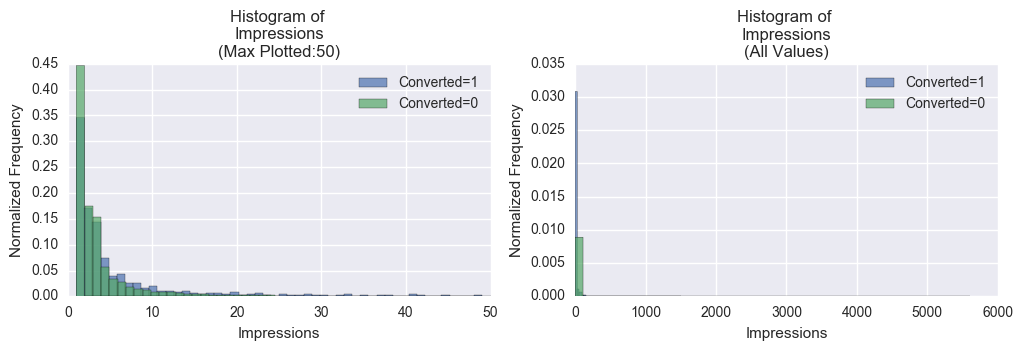

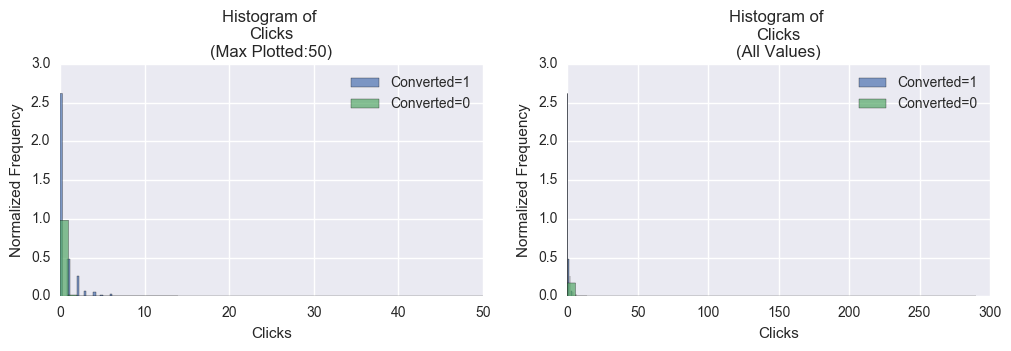

In [16]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

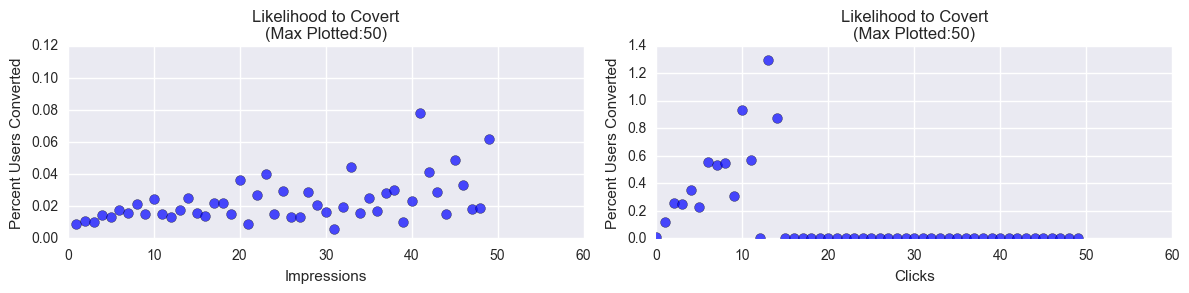

In [17]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=50,
                    alpha=.7)

**Notes**
* **Impressions**
    * Histogram for Converted=1 is slightly skewed to the right, showing that more impressions may have an impact on the likelihood for a user to convert.
    * Users with more impressions tend to convert more often.
* **Clicks**
    * Users who click more often on ads are more likely to convert.  The trend is stronger than for impressions, but the trend falls to zero at higher values (most likely becaues these cases are rare).
    * Consideration: Since we cannot control whether or not a user will click when designing the ad campaing, we may want to consider excluding this feature.

### Features: Time Difference Between Impressions

In [18]:
features=['TimeDiff_Hours','TimeDiff_Hours_AVG','TimeDiff_Days','TimeDiff_Days_AVG']

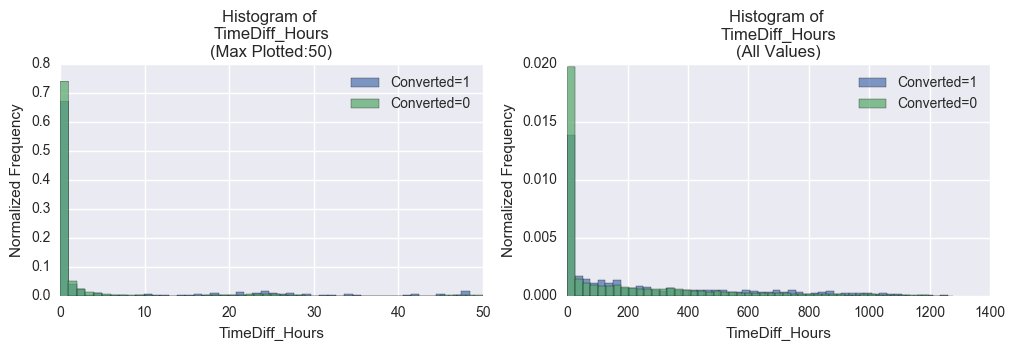

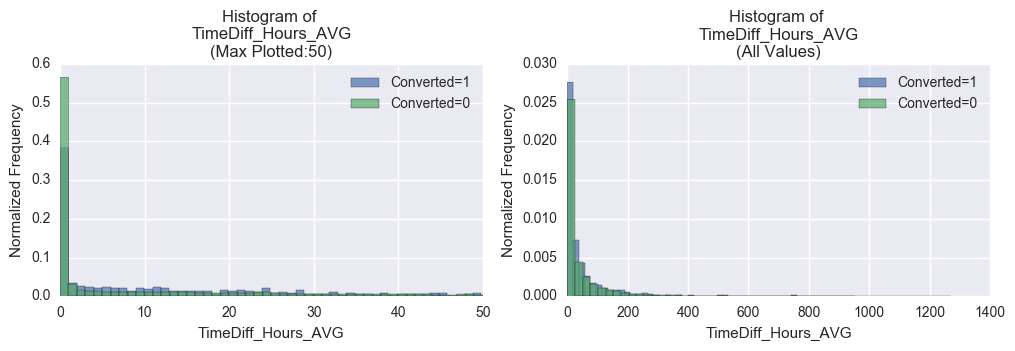

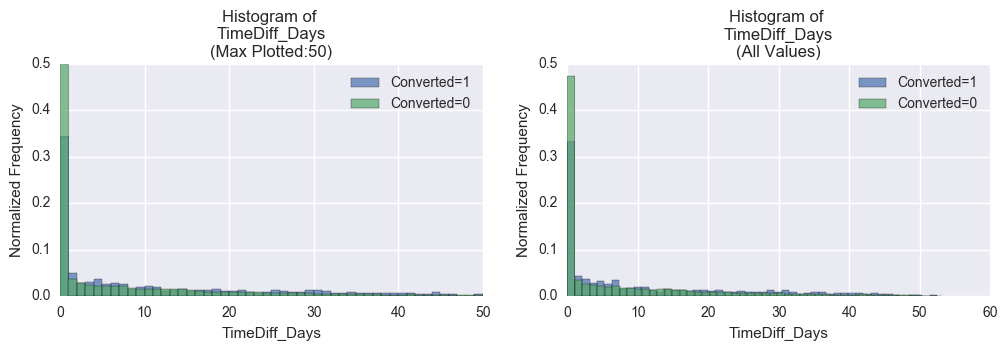

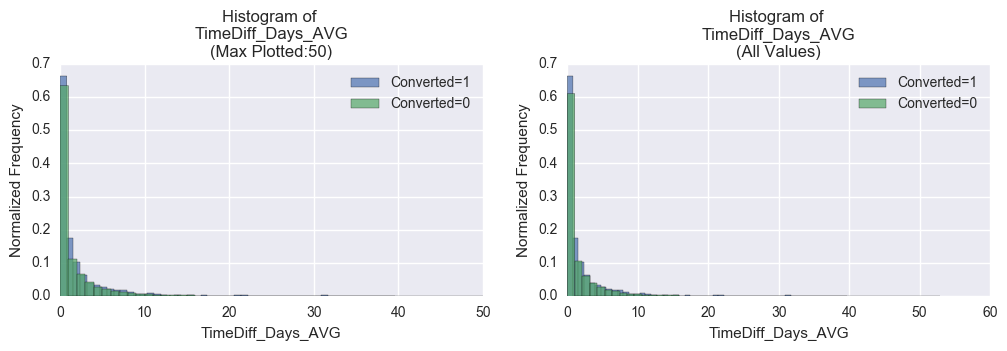

In [19]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

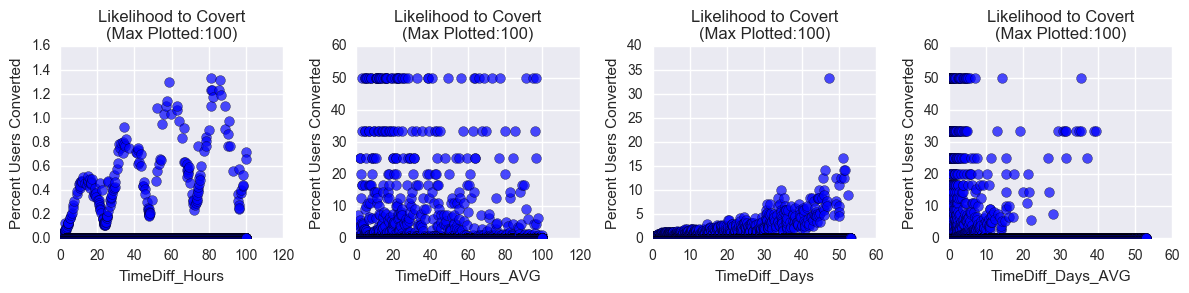

In [20]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=100,
                    alpha=.7)

** Notes **
* **TimeDiff_Hours**: There is an interesting trend the shows that a user is more likely to convert if the time difference from their first and last ad is ~12hrs later in the same day, and slightly more if 36hrs later, etc.  Perhaps this trend is due to seeing ads in the morning vs evening.
* **TimeDiff_Hours_AVG**: Based on the scatter plot, this feature seems to not have much predictive power on the likelihood to convert.
* **TimeDiff_Hours**: It seems that users are slightly more likely to convert when the time between their first ad and their last ad is several says.  However, this feature may be correlated with Impressions.  We will check correlations in the last section.
* **TimeDiff_Days_AVG**: Based on the scatter plot, this feature may have limited predictive power on the likelihood to convert.

### Features: Campaign Tactic (Funnel)

In [21]:
features=['Funnel_Upper_Imp',
          'Funnel_Middle_Imp',
          'Funnel_Lower_Imp']

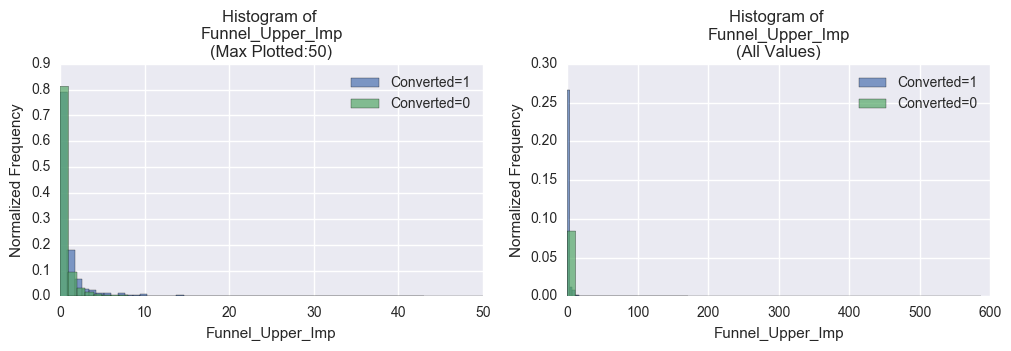

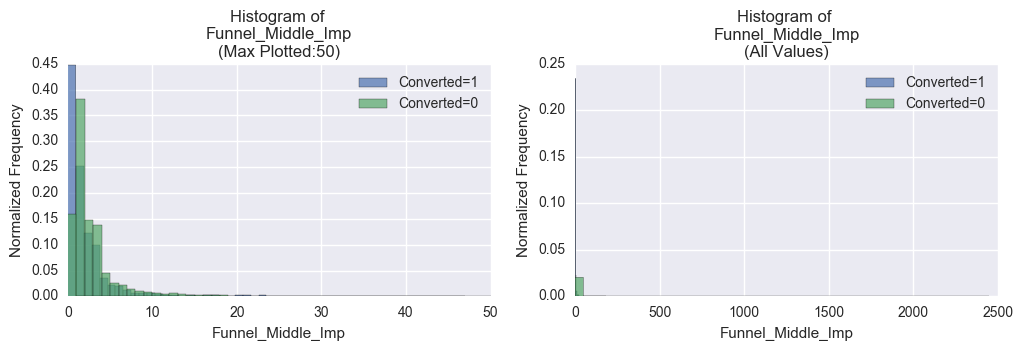

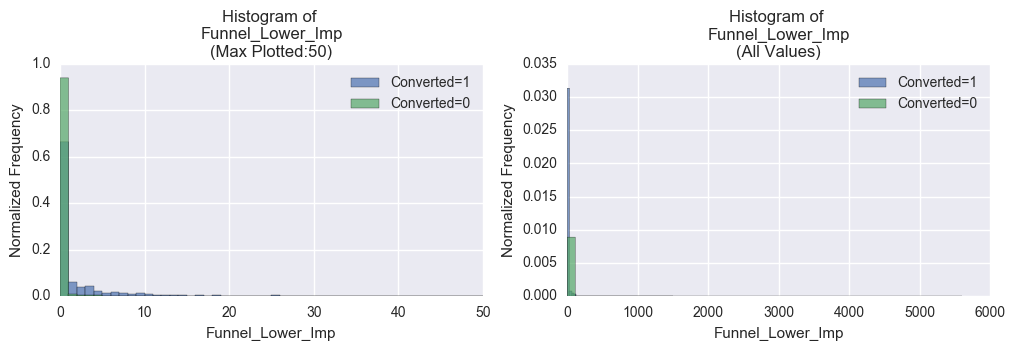

In [22]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

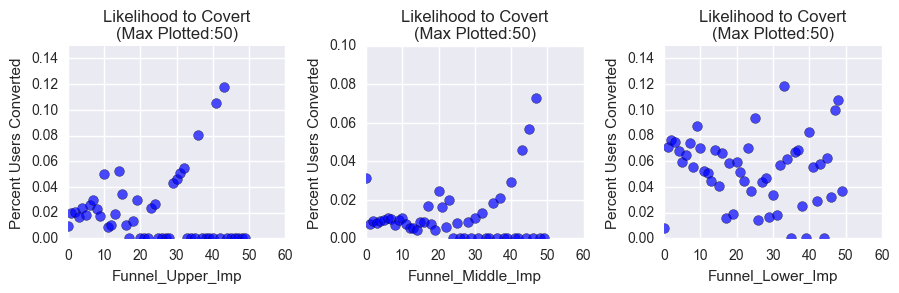

In [23]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=50,
                    alpha=.7)

**Notes**
* The more impressions a user sees from each part of the funnel (Upper,Middle,Lower), the likelihood to convert increases.  Some interesting differences are:
    * **Funnel_Upper_Imp**: The scatter plot looks the most linear here compared to Middle and Lower funnel impressions.
    * **Funnel_Middle_Imp**: The histogram is skewed to the left, and the scatter plot trend starts somewhat flat before exponentially growing. This seems to show that the impressions in the middle funnel seem to only have impact at higher impression levels.
    * **Funnel_Lower_Imp**: Impressions from the lower funnel seem to have the greatest impact on likelihood to convert, but the scatter plot is noisier.

### Features: Campaign / Message

In [24]:
features=['Campaign_Card_Cash_Rewards_Imp',
          'Campaign_Card_Premium_Rewards_Imp',
          'Campaign_Card_Other_Imp',
          'Campaign_Message_Service_Imp',
          'Campaign_Message_Family_Travel_Imp',
          'Campaign_Message_Travel_Imp']

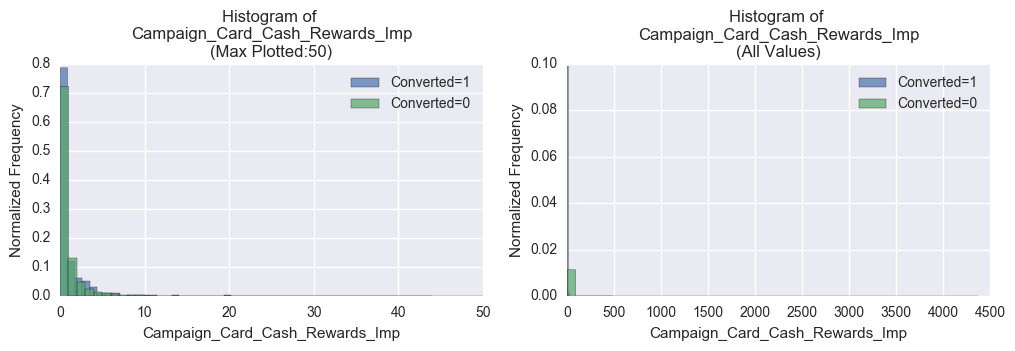

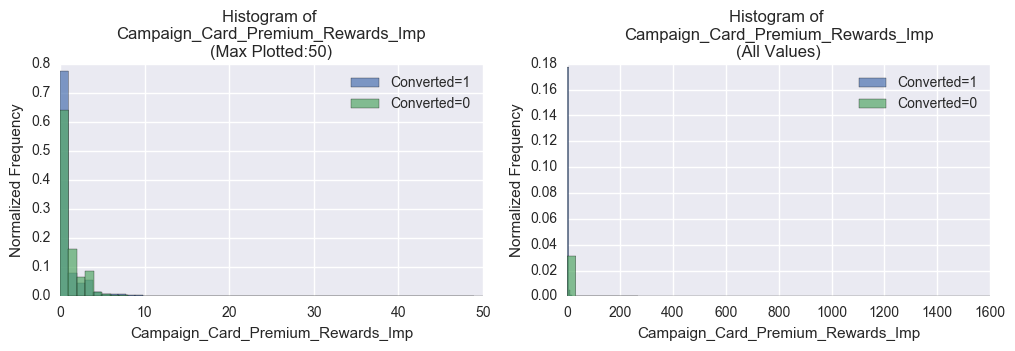

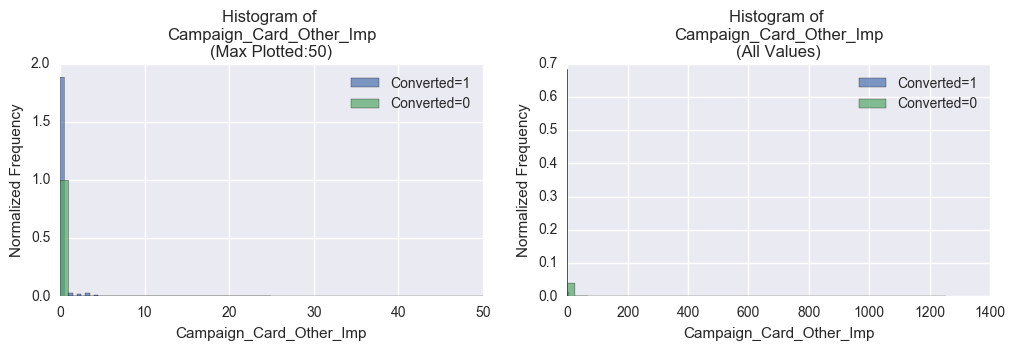

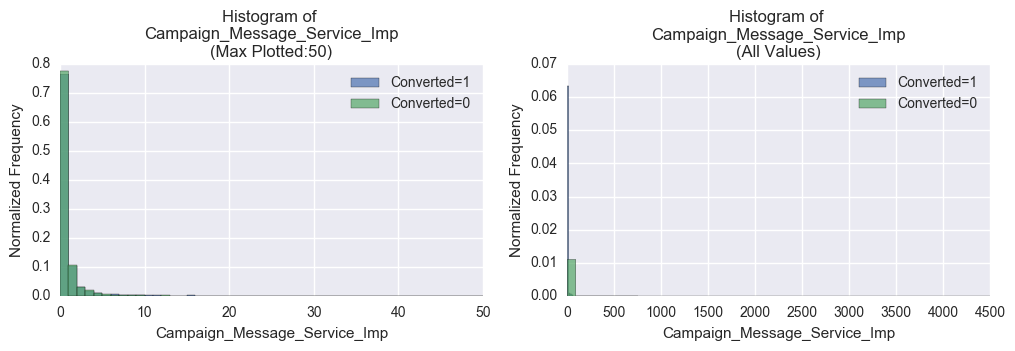

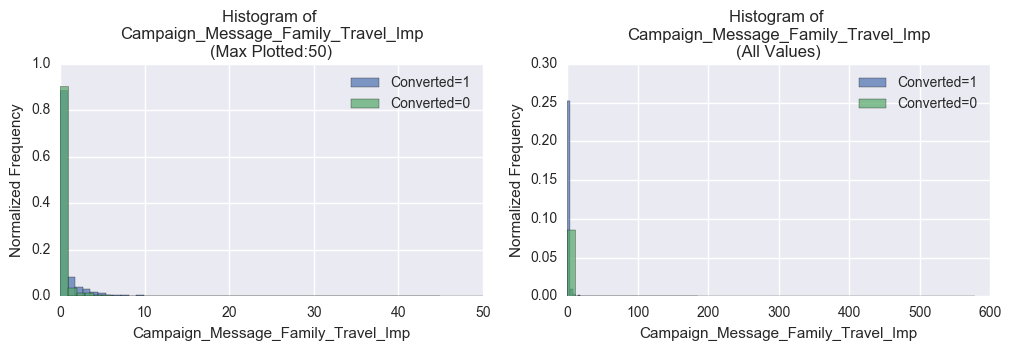

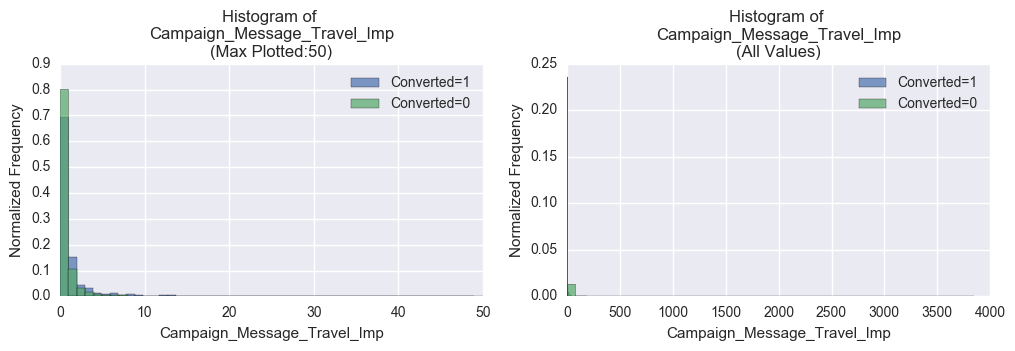

In [25]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

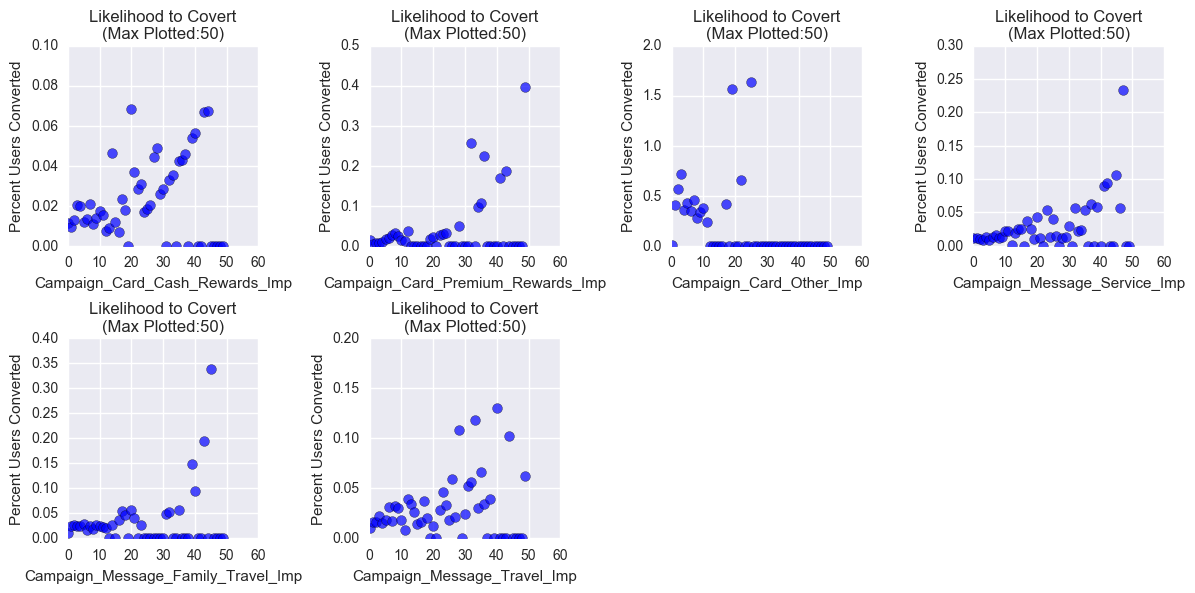

In [26]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=50,
                    alpha=.7)

**Notes**
* The more impressions a user sees from Campaign, the likelihood to convert increases.  Some interesting differences are:
    * **Highest impact on likelihood to convert:**
        * Campaign_Card_Other_Imp (but the scatter plot is very noisy)
        * Campaign_Card_Premium_Rewards_Imp
    * **Average:**
        * Campaign_Message_Service_Imp
        * Campaign_Message_Family_Travel_Imp
    * **Below Average:**
        * Campaign_Card_Cash_Rewards_Imp
        * Campaign_Message_Travel_Imp

### Features: Creative Type

In [27]:
features=['Creative_Type_Display_Imp',
          'Creative_Type_TrueView_Imp',
          'Creative_Type_RichMediaExpanding_Imp',
          'Creative_Type_RichMedia_Imp']

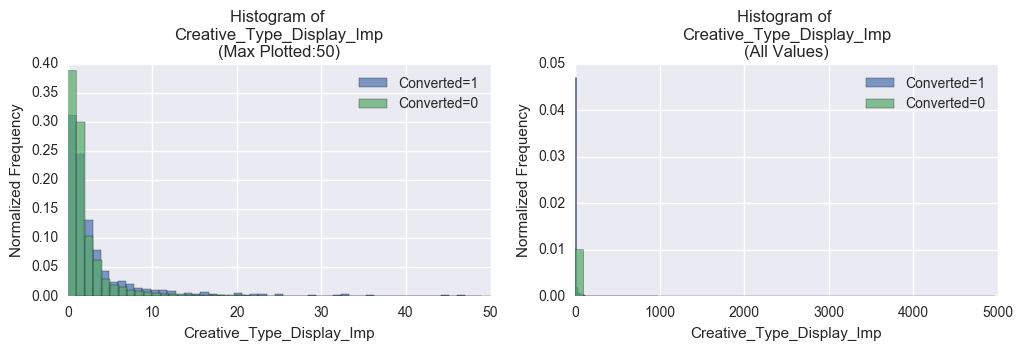

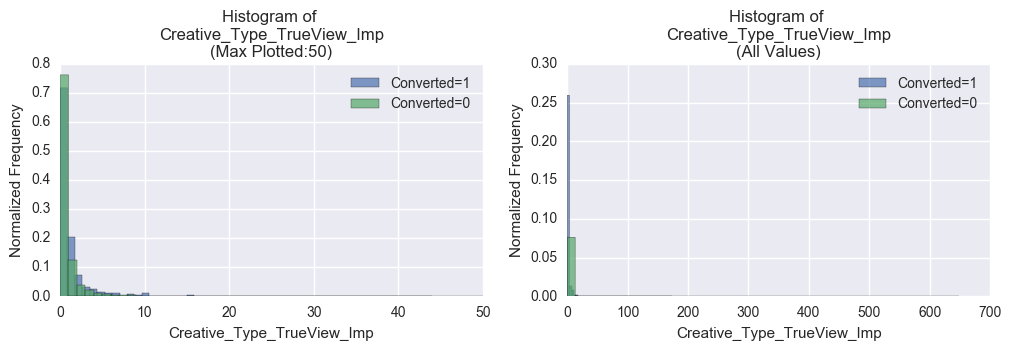

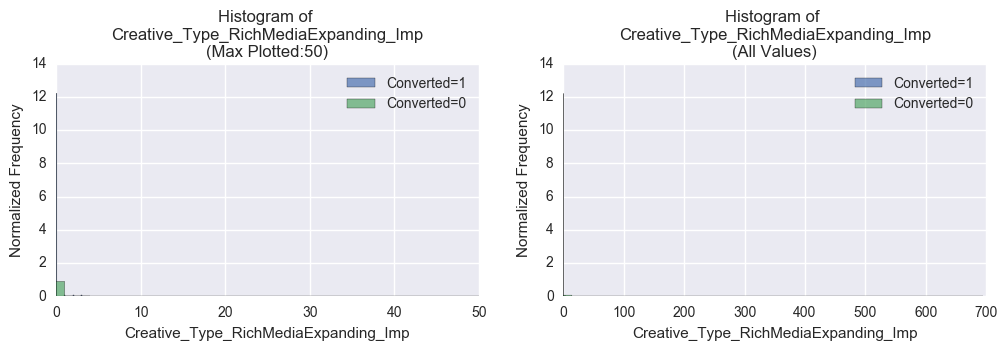

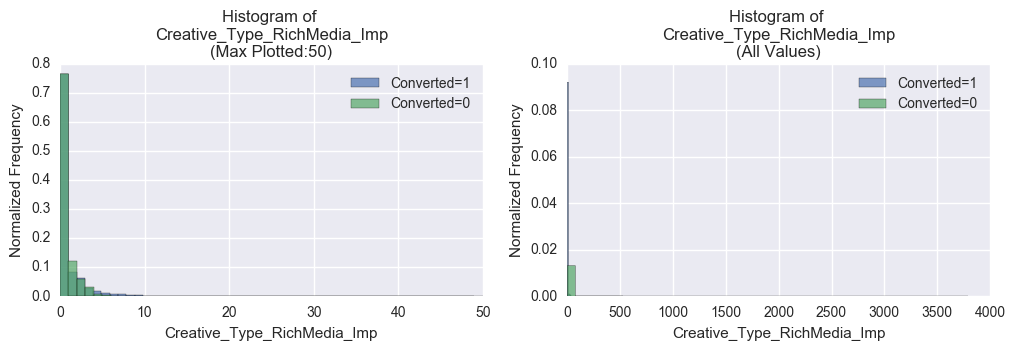

In [28]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

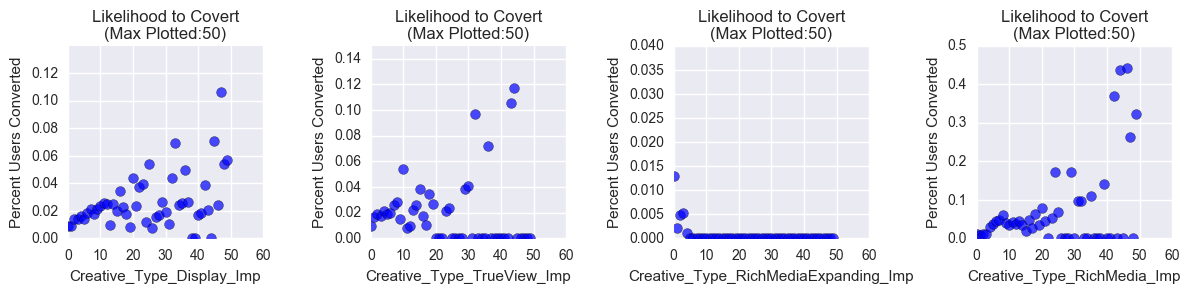

In [29]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=50,
                    alpha=.7)

**Notes**
* The more impressions a user sees from a specific type of creative, the likelihood to convert increases.  Some interesting differences are:
    * **Highest impact on likelihood to convert:**
        * Creative_Type_RichMedia_Imp
    * **Average:**
        * Creative_Type_TrueView_Imp
        * Creative_Type_Display_Imp
    * **Not Clear:**
        * Creative_Type_RichMediaExpanding_Imp

### Features: Creative Size

In [30]:
features=['Creative_Size_728x90_Imp',
          'Creative_Size_300x600_Imp',
          'Creative_Size_300x250_Imp',
          'Creative_Size_160x600_Imp',
          'Creative_Size_468x60_Imp',
          'Creative_Size_300x50_Imp',
          'Creative_Size_320x50_Imp',
          'Creative_Size_320x420_Imp',
          'Creative_Size_480x320_Imp',
          'Creative_Size_320x480_Imp',
          'Creative_Size_Uknown_Imp']

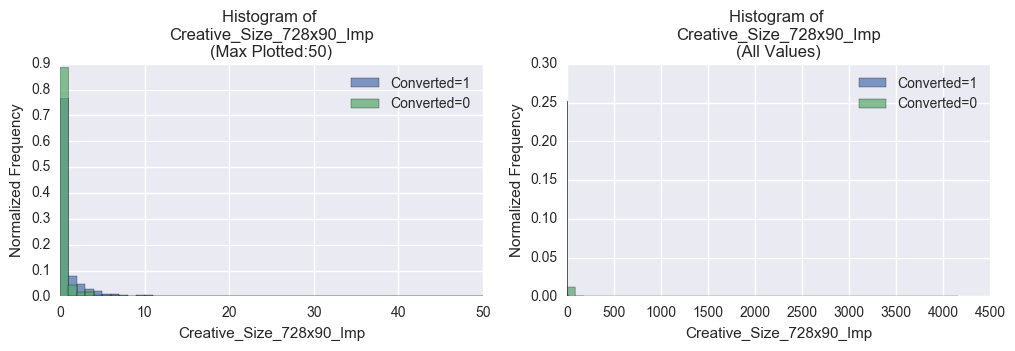

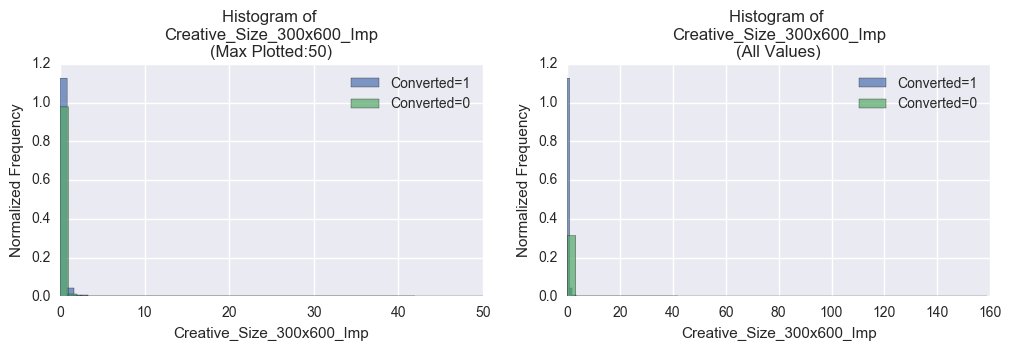

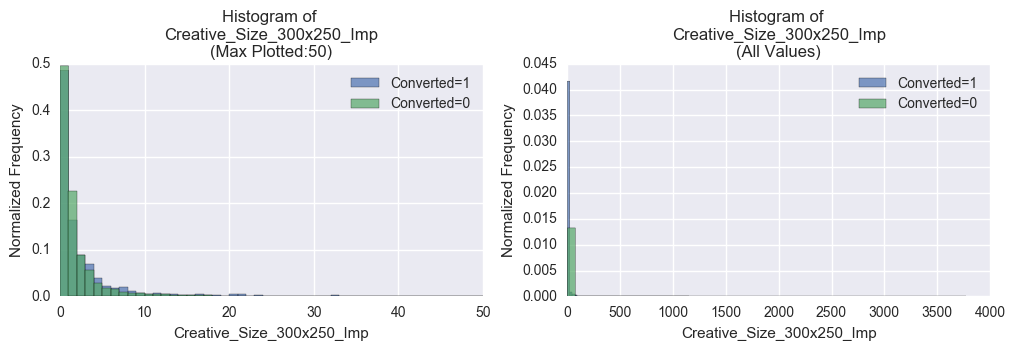

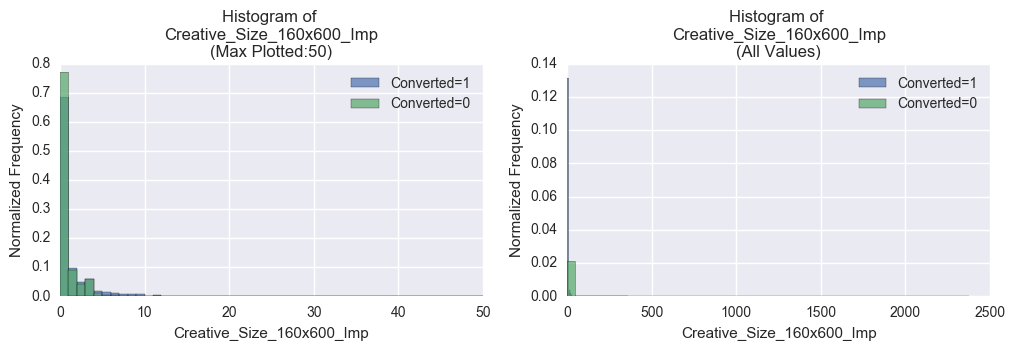

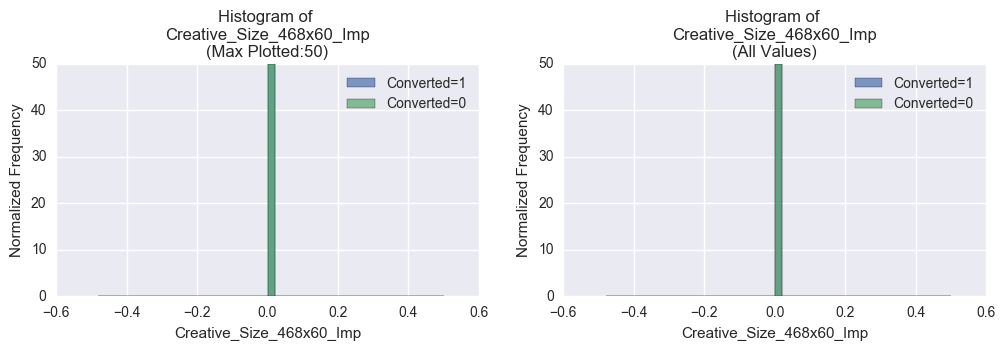

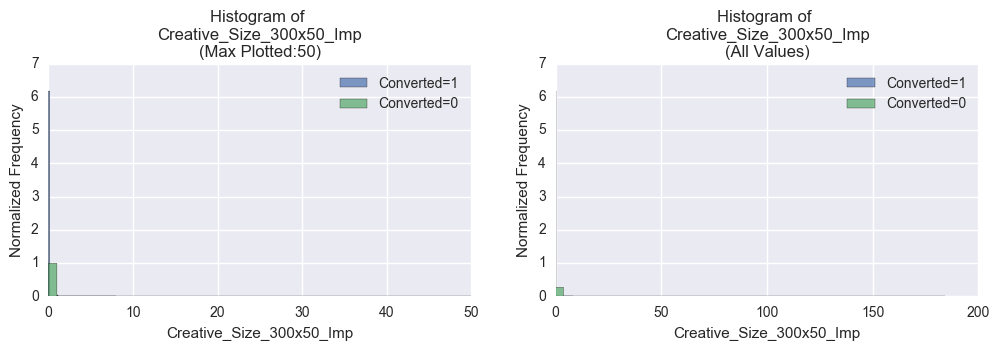

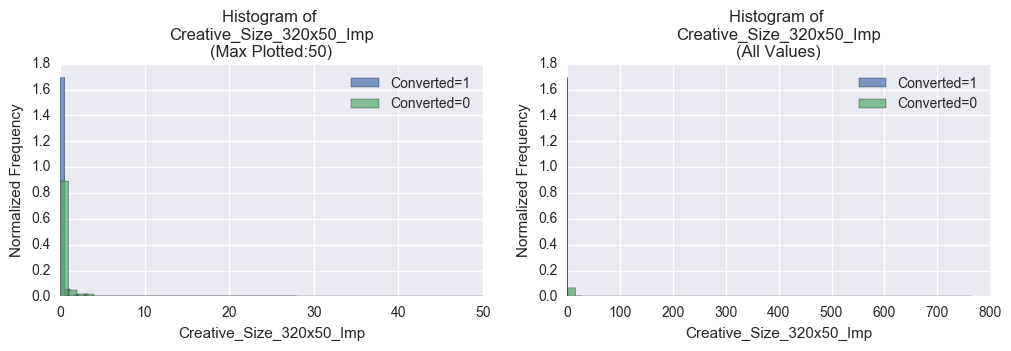

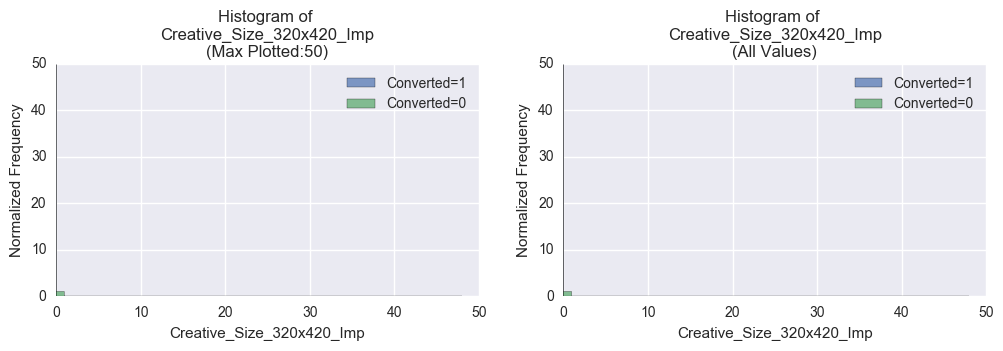

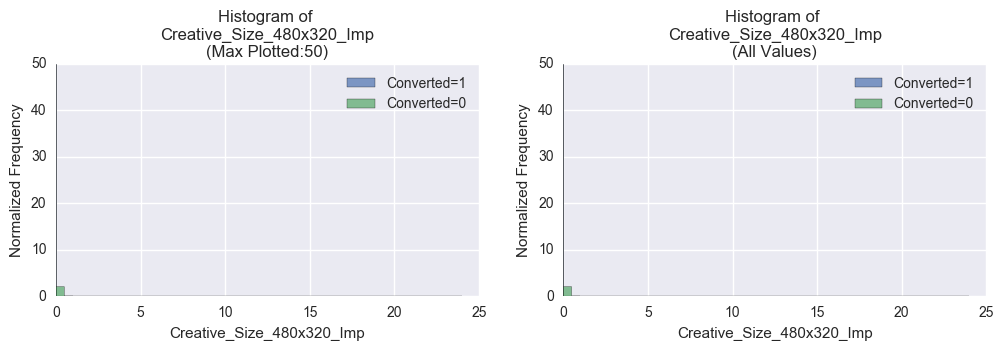

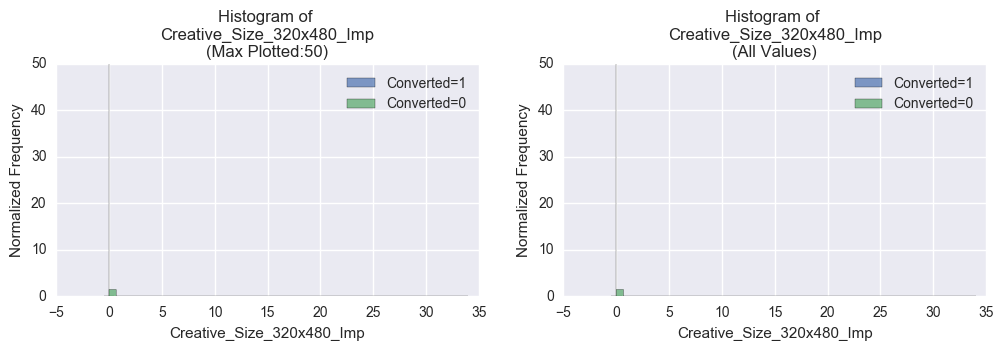

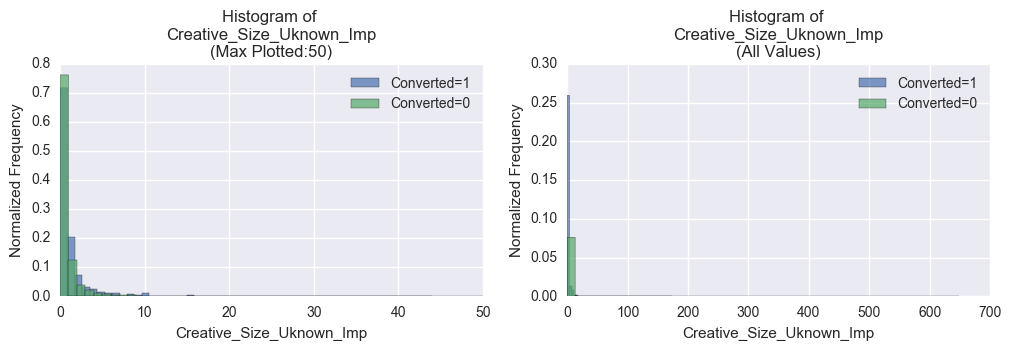

In [31]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

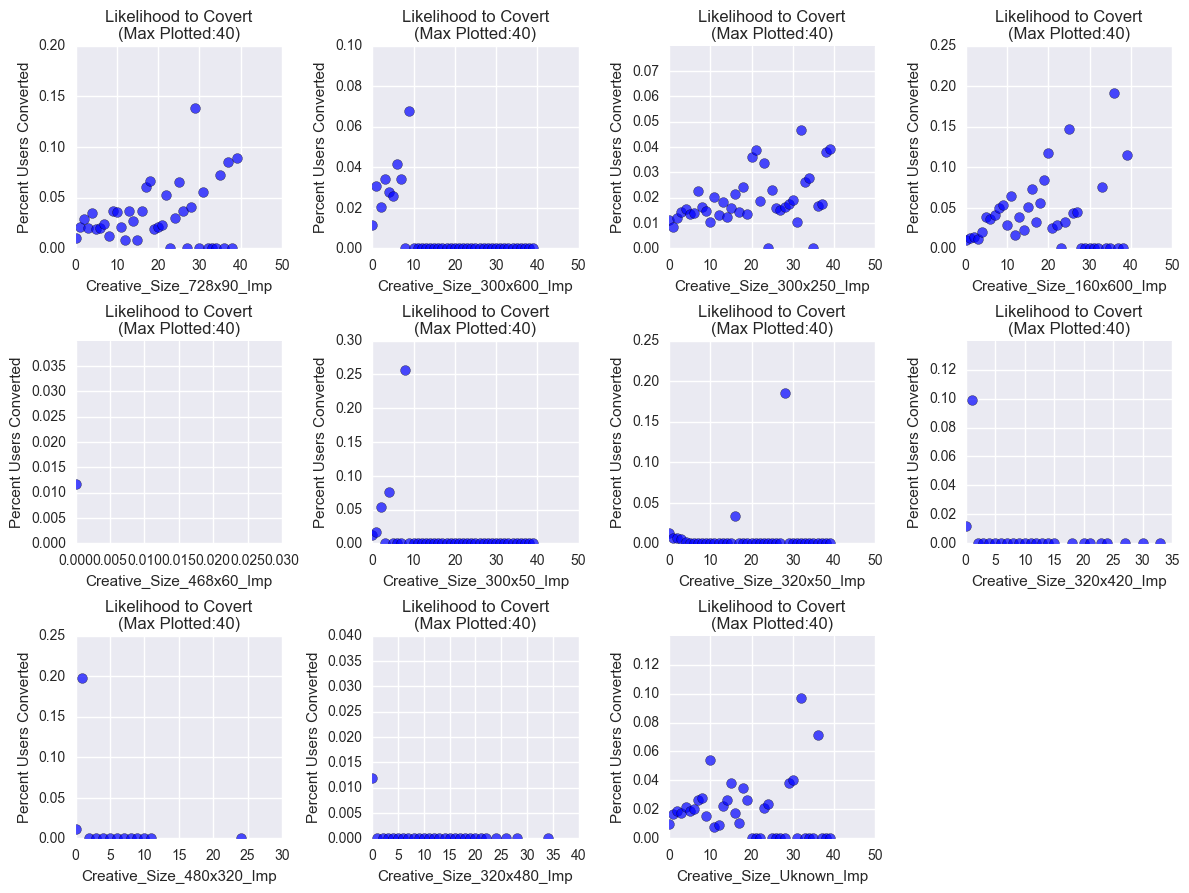

In [32]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=40,
                    alpha=.7)

**Notes**
* The more impressions a user sees from a specific creative size, the likelihood to convert increases.  Some interesting differences are:
    * **Highest impact on likelihood to convert:**
        * Creative_Size_728x90_Imp
        * Creative_Size_160x600_Imp
    * **Average:**
        * Creative_Size_300x600_Imp
        * Creative_Size_300x250_Imp
        * Creative_Size_Uknown_Imp
    * **Not Clear (Possibly due to not enough users with receiving these creative sizes):**
        * Creative_Size_468x60_Imp (no observations with non=zero values)
        * Creative_Size_300x50_Imp
        * Creative_Size_320x50_Imp
        * Creative_Size_320x420_Imp
        * Creative_Size_480x320_Imp
        * Creative_Size_320x480_Imp

#### Features: Device Type

In [33]:
features=['Device_Desktop_Imp',
          'Device_Other_Imp',
          'Device_Mobile_Imp']

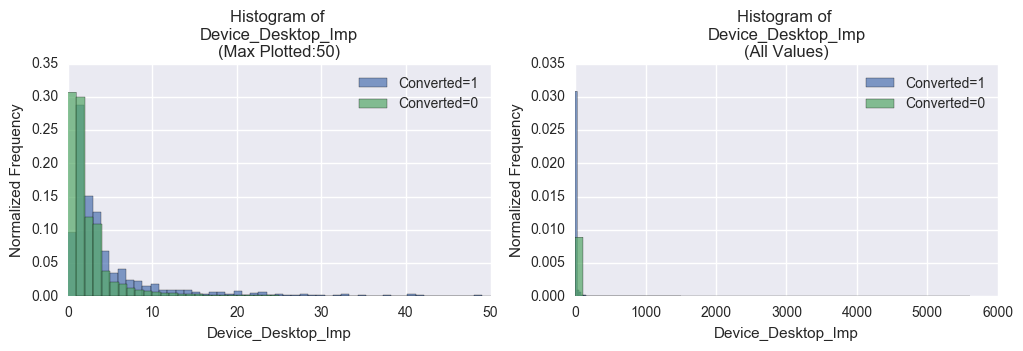

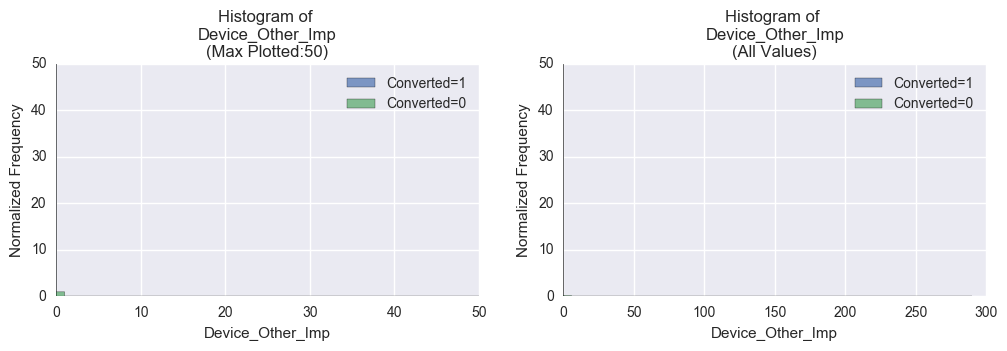

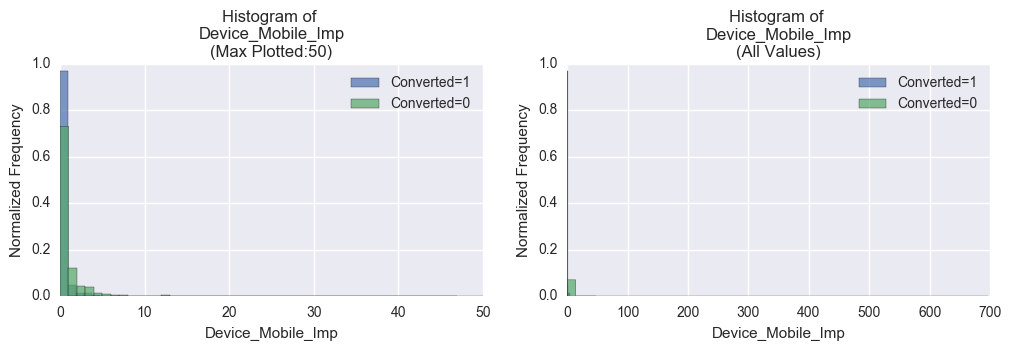

In [34]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

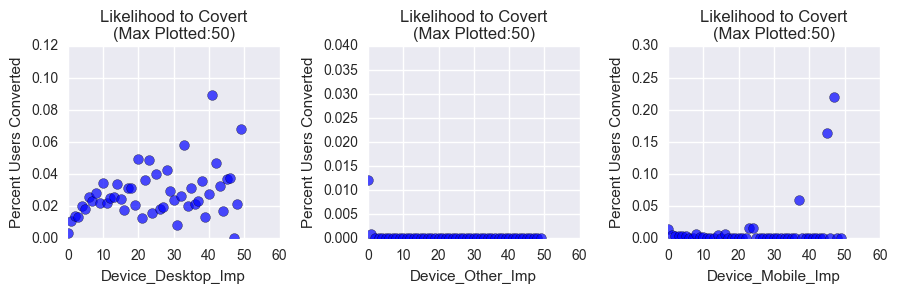

In [35]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=50,
                    alpha=.7)

**Notes**
* The trend for Desktop impressions looks very similar to the overall trend for total impressions to users.
* Impressions on Mobile and "Other" devices tends to not impact the likelihood to convert (perhaps because the application process is easiest on desktops).

### Features: Viewability

In [36]:
features = ['Impressions',
            'Active_View_Eligible_Impressions',
            'Active_View_Measurable_Impressions',
            'Active_View_Viewable_Impressions']

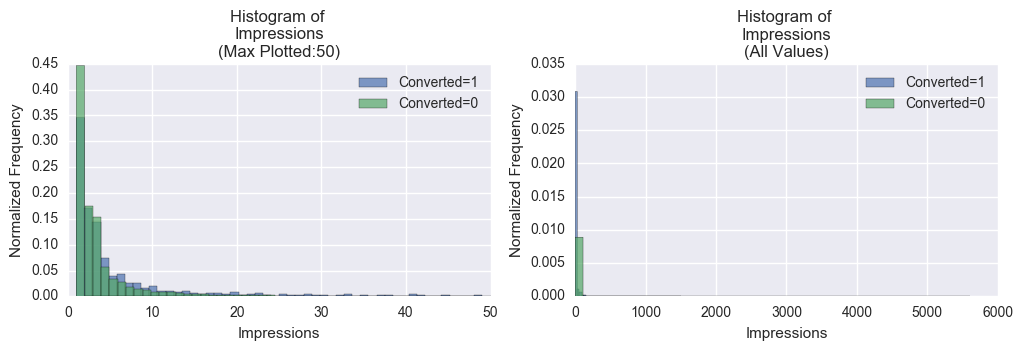

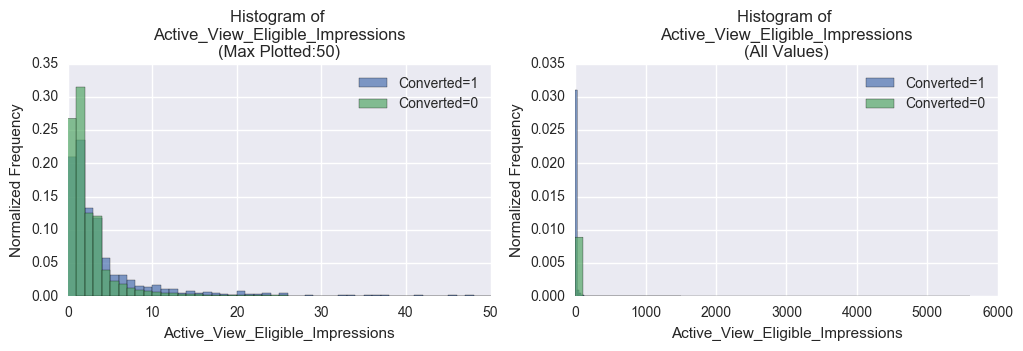

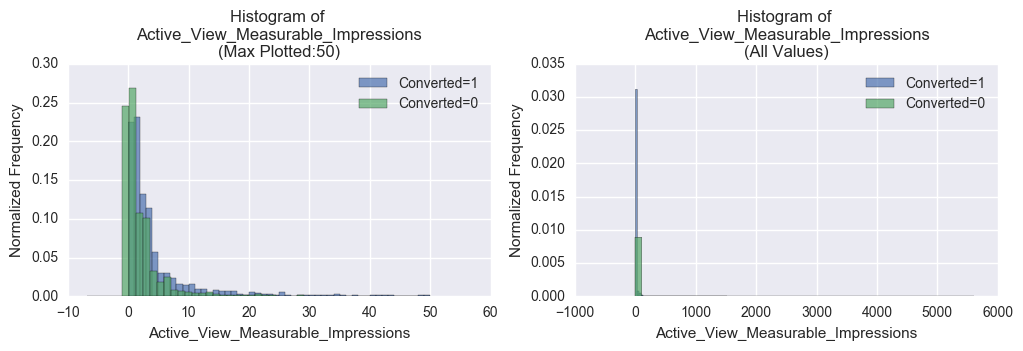

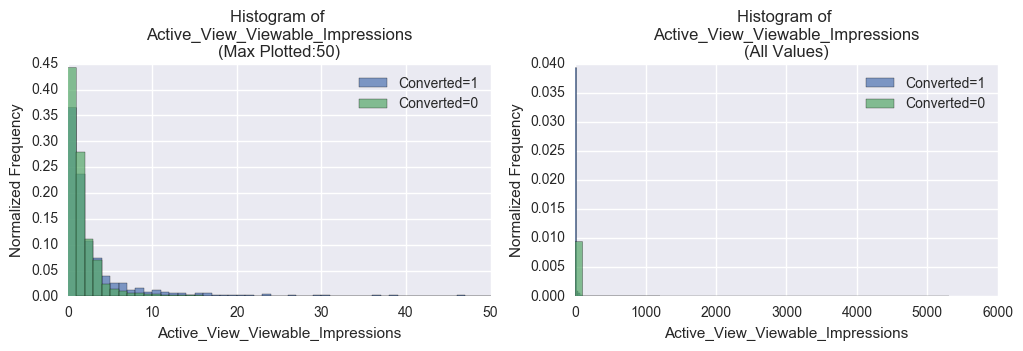

In [37]:
combined_histograms(chart_data=data,
                    features=features,
                    max_value=50,
                    bins=50,
                    alpha=.7)

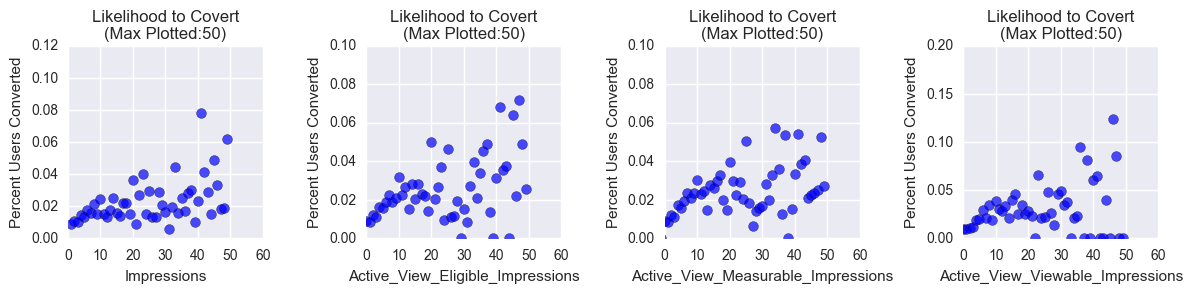

In [38]:
combined_likelihood(chart_data=data,
                    features=features,
                    max_value=50,
                    alpha=.7)

**Notes**
* Note surprisingly, Eligible and Measureable impressions have limited impact on the likelihood to convert (in comparison to impressions).
* However, we do see a greater impact on the likelihood to convert when users are shown more viewable impressions.

### D. Correlations

In [39]:
corr_matrix = data.iloc[:,1:].corr()

In [40]:
corr_matrix

,Impressions,TimeDiff_Minutes,TimeDiff_Minutes_AVG,Funnel_Upper_Imp,Funnel_Middle_Imp,Funnel_Lower_Imp,Campaign_Message_Travel_Imp,Campaign_Message_Service_Imp,Campaign_Message_Family_Travel_Imp,Campaign_Card_Cash_Rewards_Imp,...,Device_Mobile_Imp,Active_View_Eligible_Impressions,Active_View_Measurable_Impressions,Active_View_Viewable_Impressions,Clicks,Conversions,TimeDiff_Hours,TimeDiff_Hours_AVG,TimeDiff_Days,TimeDiff_Days_AVG
Impressions,1.000000,0.396882,-0.065866,0.411142,0.454969,0.880232,0.671354,0.733668,0.239552,0.442084,...,0.160254,0.962278,0.956925,0.889820,0.084866,0.003944,0.396882,-0.065866,0.396882,-0.065866
TimeDiff_Minutes,0.396882,1.000000,0.509022,0.370280,0.209386,0.268972,0.300682,0.279919,0.192064,0.105128,...,0.176893,0.305434,0.304000,0.250899,0.070091,0.003368,1.000000,0.509022,1.000000,0.509022
TimeDiff_Minutes_AVG,-0.065866,0.509022,1.000000,0.022592,-0.083422,-0.044910,-0.018523,-0.036213,-0.016387,-0.054199,...,-0.011959,-0.078082,-0.076376,-0.064442,0.007724,0.001077,0.509022,1.000000,0.509022,1.000000
Funnel_Upper_Imp,0.411142,0.370280,0.022592,1.000000,0.014146,0.208891,0.417710,0.398982,0.001866,0.029221,...,0.041280,0.188256,0.191146,0.152999,0.023442,0.001778,0.370280,0.022592,0.370280,0.022592
Funnel_Middle_Imp,0.454969,0.209386,-0.083422,0.014146,1.000000,0.046122,0.059025,0.122034,0.322750,0.697076,...,0.295088,0.452633,0.407287,0.294253,0.017117,-0.001295,0.209386,-0.083422,0.209386,-0.083422
Funnel_Lower_Imp,0.880232,0.268972,-0.044910,0.208891,0.046122,1.000000,0.675527,0.725571,0.129860,0.180413,...,0.034860,0.899663,0.915365,0.901450,0.088991,0.005002,0.268972,-0.044910,0.268972,-0.044910
Campaign_Message_Travel_Imp,0.671354,0.300682,-0.018523,0.417710,0.059025,0.675527,1.000000,0.340962,0.076617,0.021622,...,0.005859,0.613988,0.626191,0.610142,0.036758,0.002626,0.300682,-0.018523,0.300682,-0.018523
Campaign_Message_Service_Imp,0.733668,0.279919,-0.036213,0.398982,0.122034,0.725571,0.340962,1.000000,0.049298,0.010087,...,0.216389,0.670163,0.677439,0.621625,0.038937,0.002501,0.279919,-0.036213,0.279919,-0.036213
Campaign_Message_Family_Travel_Imp,0.239552,0.192064,-0.016387,0.001866,0.322750,0.129860,0.076617,0.049298,1.000000,-0.005044,...,0.081776,0.266294,0.271098,0.246916,0.050760,0.002143,0.192064,-0.016387,0.192064,-0.016387
Campaign_Card_Cash_Rewards_Imp,0.442084,0.105128,-0.054199,0.029221,0.697076,0.180413,0.021622,0.010087,-0.005044,1.000000,...,-0.043265,0.479539,0.436966,0.367326,0.041575,0.001319,0.105128,-0.054199,0.105128,-0.054199


In [41]:
corr_threshold=0.5
corr_df=pd.DataFrame(corr_matrix.unstack(),columns=['Corr'])
corr_df['Corr_Abs']=np.abs(corr_df['Corr'])

corr_df_high = corr_df[(corr_df['Corr_Abs']!=1) & 
                       (corr_df['Corr_Abs'].isnull()==False) & 
                       (corr_df['Corr_Abs']>=corr_threshold)]

pd.set_option("display.max_rows",200)
corr_df_high

Corr  \
Impressions                          Funnel_Lower_Imp                      0.880232   
                                     Campaign_Message_Travel_Imp           0.671354   
                                     Campaign_Message_Service_Imp          0.733668   
                                     Creative_Type_Display_Imp             0.940023   
                                     Creative_Size_728x90_Imp              0.674878   
                                     Creative_Size_300x250_Imp             0.846076   
                                     Device_Desktop_Imp                    0.969654   
                                     Active_View_Eligible_Impressions      0.962278   
                                     Active_View_Measurable_Impressions    0.956925   
                                     Active_View_Viewable_Impressions      0.889820   
TimeDiff_Minutes                     TimeDiff_Minutes_AVG                  0.509022   
                                     TimeDiff_Hours                        1.000000   
                                     TimeDiff_Hours_AVG                    0.509022   
                                     TimeDiff_Days                         1.000000   
                                     TimeDiff_Days_AVG                     0.509022   
TimeDiff_Minutes_AVG                 TimeDiff_Minutes                      0.509022   
                                     TimeDiff_Hours                        0.509022   
                                     TimeDiff_Hours_AVG                    1.000000   
                                     TimeDiff_Days                         0.509022   
                                     TimeDiff_Days_AVG                     1.000000   
Funnel_Upper_Imp                     Creative_Type_TrueView_Imp            0.971363   
                                     Creative_Size_Uknown_Imp              0.971363   
Funnel_Middle_Imp                    Campaign_Card_Cash_Rewards_Imp        0.697076   
                                     Creative_Size_300x250_Imp             0.597894   
Funnel_Lower_Imp                     Impressions                           0.880232   
                                     Campaign_Message_Travel_Imp           0.675527   
                                     Campaign_Message_Service_Imp          0.725571   
                                     Creative_Type_Display_Imp             0.864190   
                                     Creative_Size_728x90_Imp              0.739933   
                                     Creative_Size_300x250_Imp             0.694650   
                                     Creative_Size_160x600_Imp             0.517650   
                                     Device_Desktop_Imp                    0.883896   
                                     Active_View_Eligible_Impressions      0.899663   
                                     Active_View_Measurable_Impressions    0.915365   
                                     Active_View_Viewable_Impressions      0.901450   
Campaign_Message_Travel_Imp          Impressions                           0.671354   
                                     Funnel_Lower_Imp                      0.675527   
                                     Creative_Type_Display_Imp             0.659994   
                                     Creative_Size_728x90_Imp              0.509242   
                                     Device_Desktop_Imp                    0.670370   
                                     Active_View_Eligible_Impressions      0.613988   
                                     Active_View_Measurable_Impressions    0.626191   
                                     Active_View_Viewable_Impressions      0.610142   
Campaign_Message_Service_Imp         Impressions                           0.733668   
                                     Funnel_Lower_Imp                      0.725571   
                                     Creative_Type_Display_Imp             0.

### E. Other Considerations
* **Outliers:** All of the features in our dataset have outliers at large values (e.g. a user shown more than 1000 impressions over 2 months).  When building our model, we may want to exclude these outliers to avoid bias to our model.  A cap of 500 impressions over our time period(2 months) would be a reasonable cap.  This is equivalent to 8 impressions daily.
* Features to potentially exclude:
    * **Clicks:** If the purpose of the model is to help us design a better campaign in the future, we may want to consider excluding this feature since we can't decide which users click.  That being said, their could be an argument to keep this feature if we think that creative design could affect click rates.  We will decide this later.
    * **Creative Sizes**: Some were rarely served, so we may want to exclude those from our model.
    * **TimeDiff**: Only include one version as the Minutes, Hours, and Days versions are just simple multiples of each other.
* Many features are heavily correlated with each other, especially total impressions, because the features are mostly representing the number of impressions a user saw from a certain type of ad.  Consider using a method to identify which of the correlated features are most predictive.